<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%EC%84%B1%EA%B3%B5%EC%82%AC%EB%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 해당 옵션을 사용하지 않으면 한글 깨짐..
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd

In [3]:
# 데이터 다운로드
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
# 데이터 불러오기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 기술통계

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, 'x,y cross')

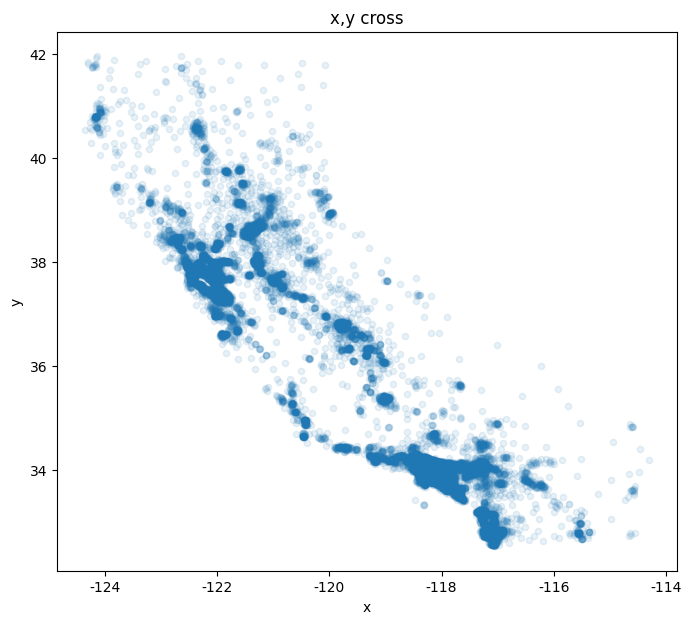

In [12]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(8,7), alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x,y cross')

Text(0, 0.5, 'y')

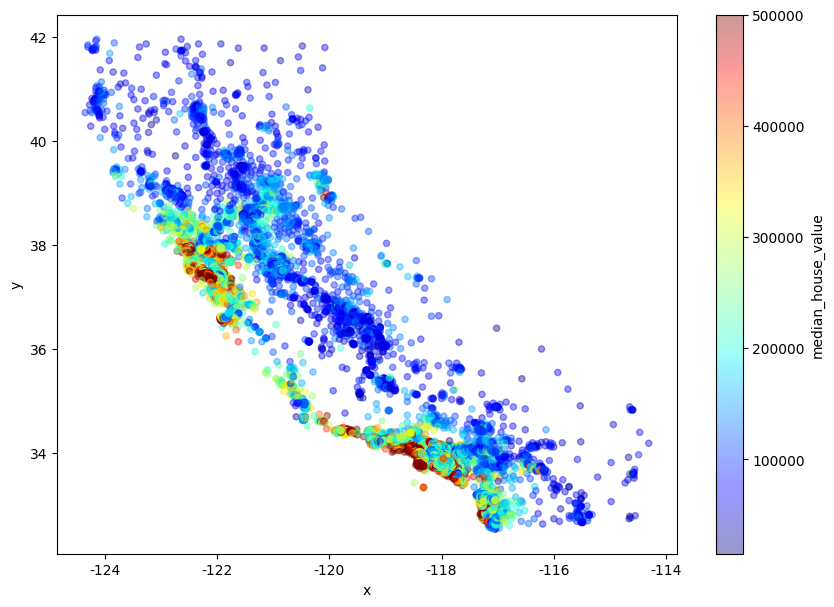

In [13]:
# 위 경도에 따른 밀집 지역
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)
plt.xlabel('x')
plt.ylabel('y')

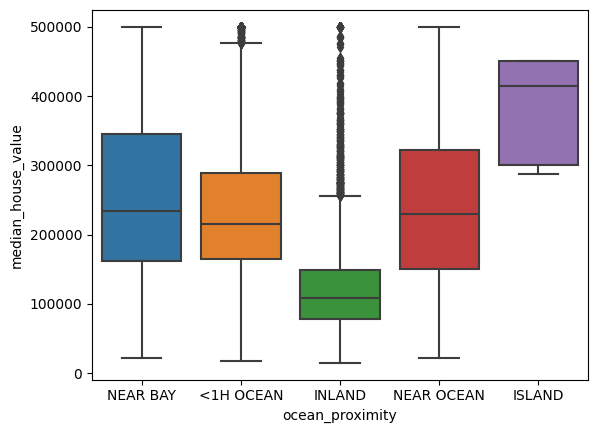

In [14]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing)
plt.show()

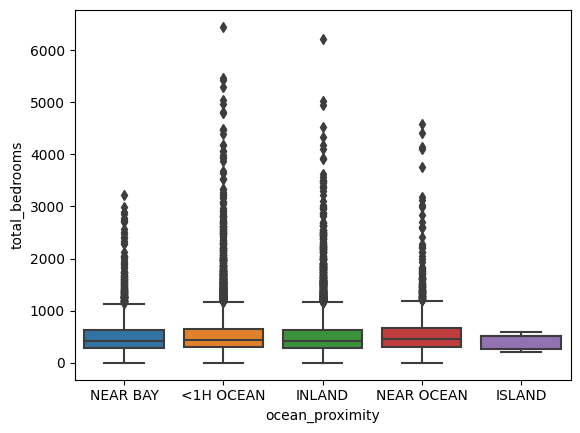

In [15]:
sns.boxplot(x="ocean_proximity", y="total_bedrooms", data=housing)
plt.show()

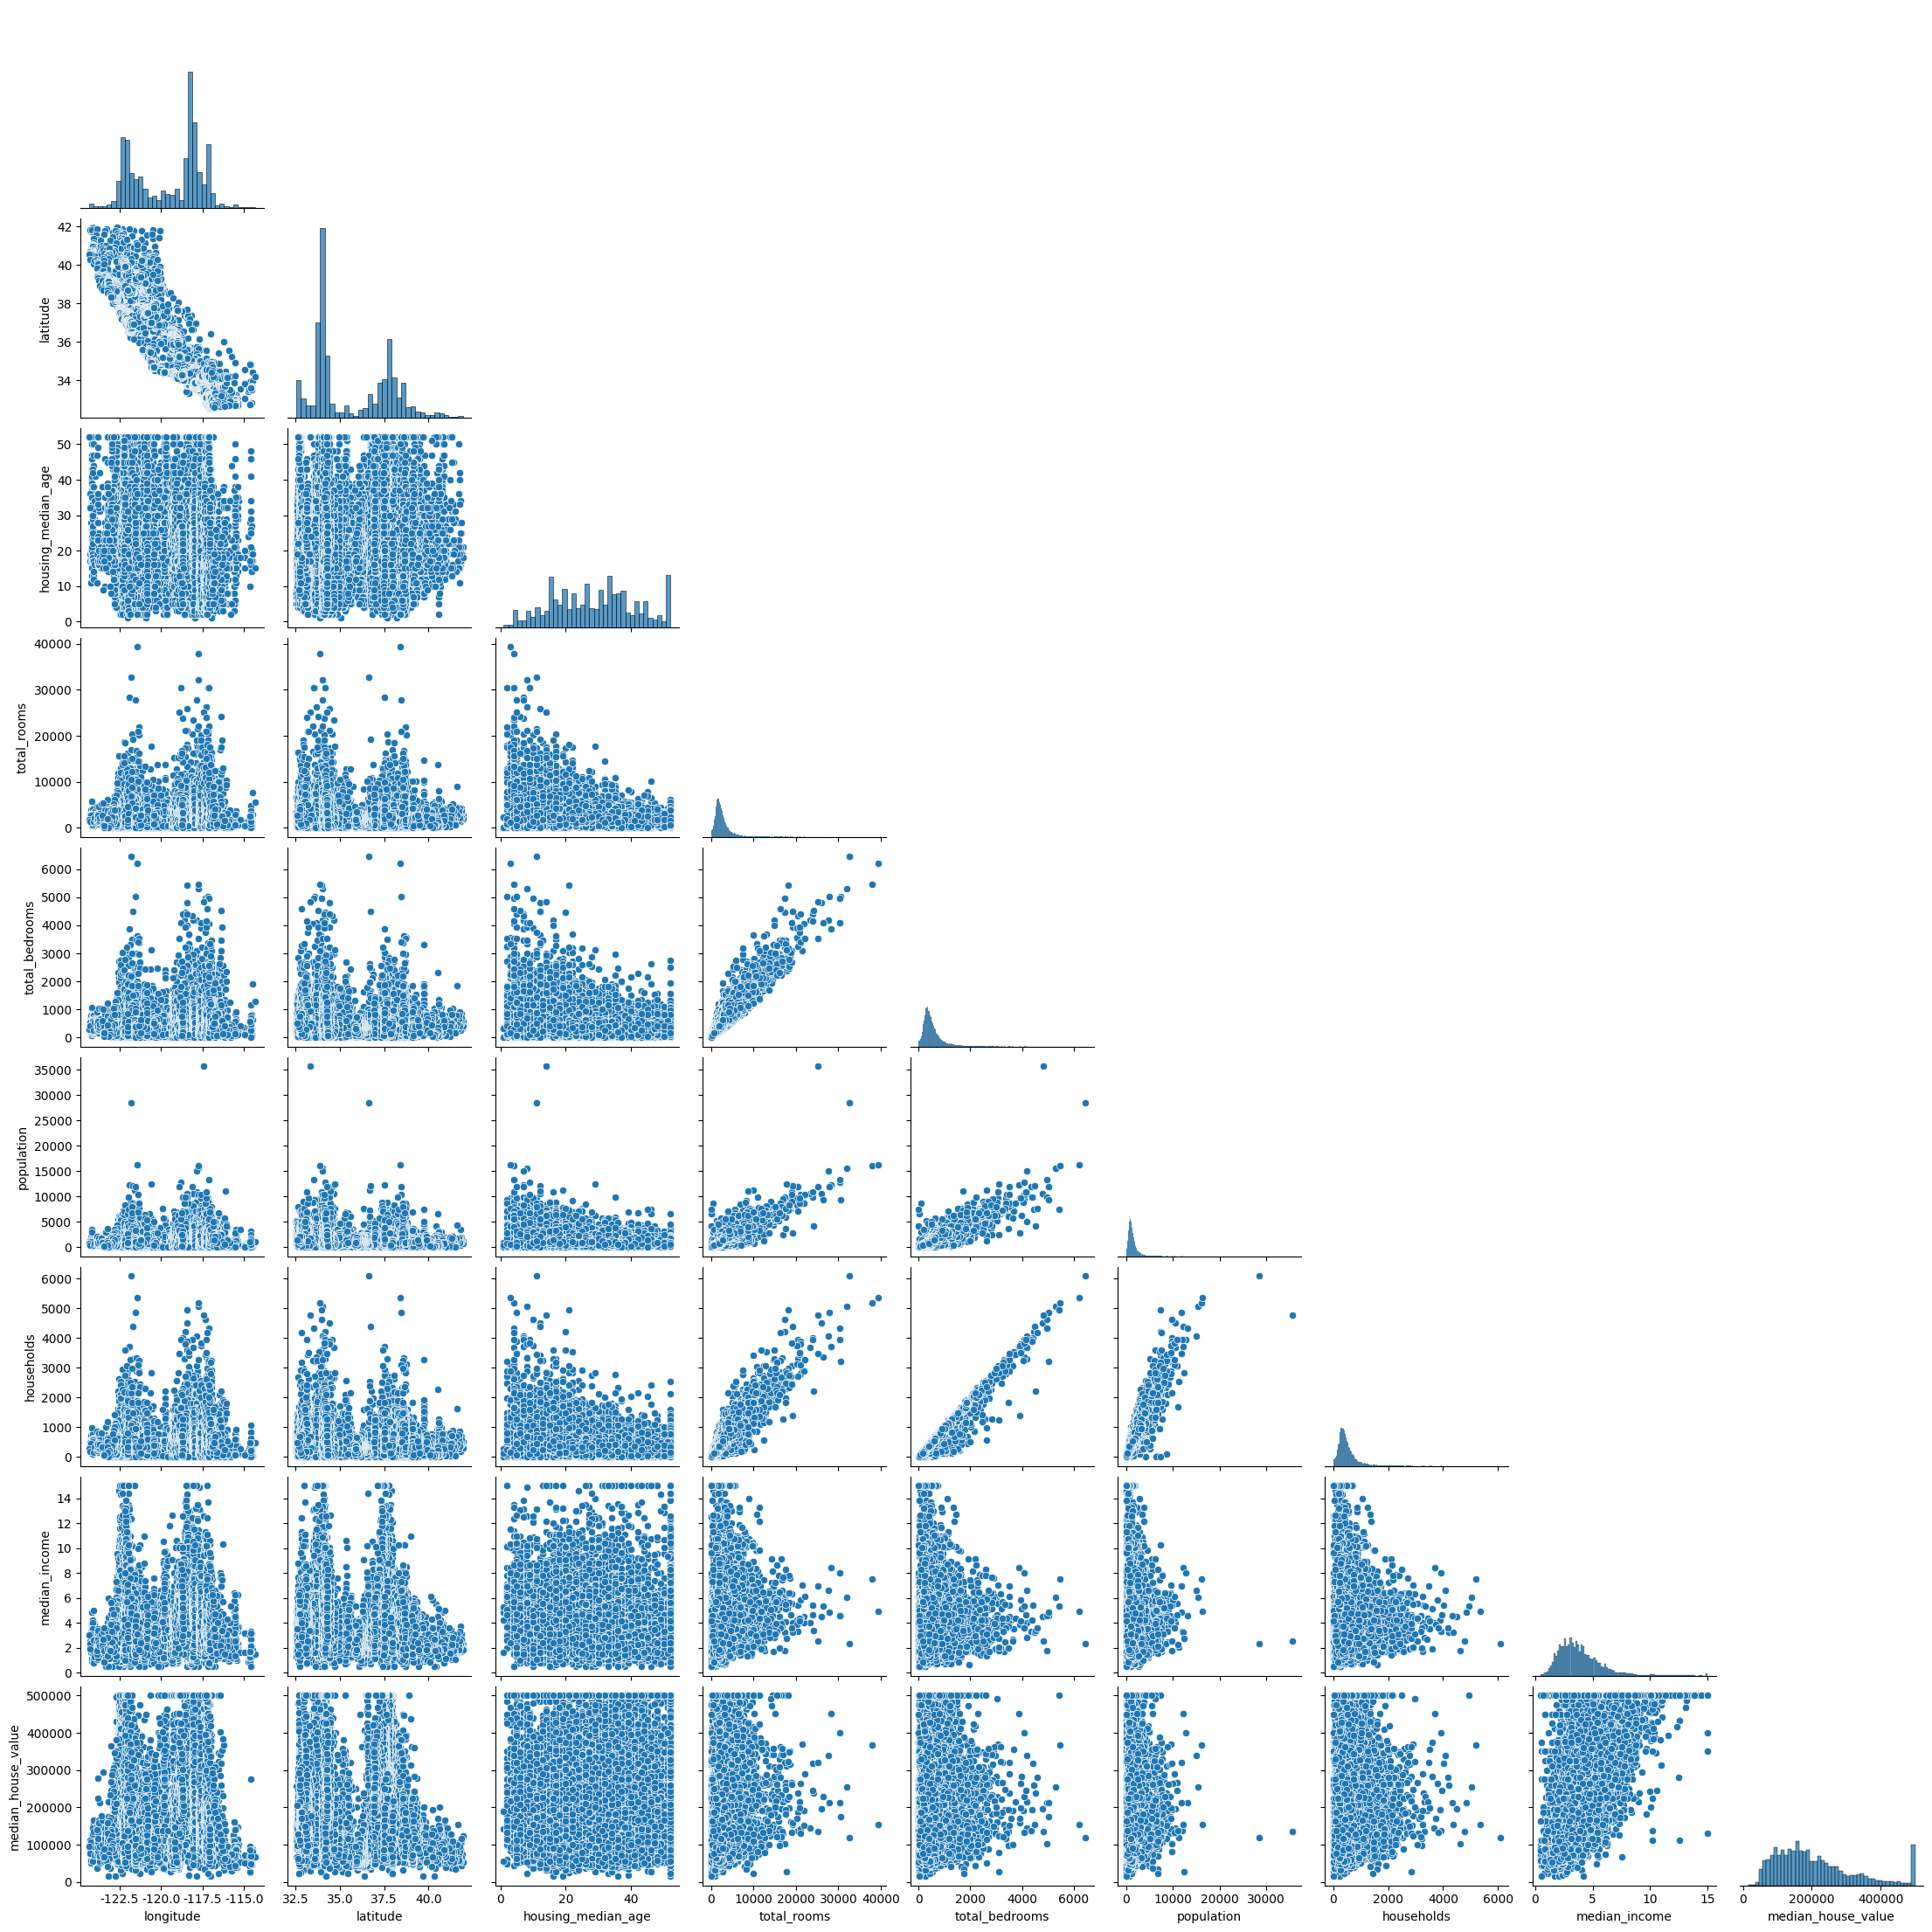

In [16]:
sns.pairplot(housing, corner=True)
plt.show()

In [17]:
# 파생변수
housing['rooms_p_household'] = housing.total_rooms / housing.households
housing['bedrooms_p_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_p_household'] = housing.population / housing.households

In [18]:
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_p_household         0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population_p_household   -0.023737
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedrooms_p_room          -0.255880
Name: median_house_value, dtype: float64

In [19]:
housing.drop(['total_rooms',
              'households',
              'total_bedrooms',
              'population_p_household'],
             axis=1, inplace=True)

## 결측치 처리

In [20]:
housing['bedrooms_p_room'].fillna(housing['bedrooms_p_room'].mean(), inplace=True)

In [21]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
population            0
median_income         0
median_house_value    0
ocean_proximity       0
rooms_p_household     0
bedrooms_p_room       0
dtype: int64

In [22]:
# 범주형 데이터 전처리
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = pd.concat([housing, one_hot], axis=1)
housing.drop(['ocean_proximity'], axis=1, inplace=True)

In [23]:
housing.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_p_household,bedrooms_p_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


In [24]:
# train/test 데이터 준비
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

In [25]:
# train, test 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

# min-max scaling (정규화, Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normal=scaler.fit_transform(X_train)

# valid 만들기
x_train, x_valid, y_train, y_valid = train_test_split(
    X_normal, y_train, test_size=0.2, random_state=1)

## 모델 적합

### 선형회귀

In [26]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_1 = linear.predict(x_train)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_R2 = r2_score(y_train, y_pred_1)
lin_mae = mean_absolute_error(y_train, y_pred_1)

print(lin_R2)
print(lin_mae)

0.624211813272781
51516.31446363971


In [29]:
y_pred_1_test = linear.predict(x_valid)

In [30]:
lin_R2 = r2_score(y_valid, y_pred_1_test)
lin_mae = mean_absolute_error(y_valid, y_pred_1_test)

print(lin_R2)
print(lin_mae)

0.6276659644943523
50978.07769321242


### 의사결정나무 회귀

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
y_pred_tr = tree.predict(x_train)

lin_R2 = r2_score(y_train, y_pred_tr)
lin_mae = mean_absolute_error(y_train, y_pred_tr)

print(lin_R2)
print(lin_mae)

1.0
0.0


In [33]:
y_pred_tr_test = linear.predict(x_valid)

In [34]:
tree_R2 = r2_score(y_valid, y_pred_tr_test)
tree_mae = mean_absolute_error(y_valid, y_pred_tr_test)

print(tree_R2)
print(tree_mae)

0.6276659644943523
50978.07769321242


### 랜덤 포레스트 회귀

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
y_pred_rf = tree.predict(x_train)
rf_R2 = r2_score(y_train, y_pred_rf)
rf_mae = mean_absolute_error(y_train, y_pred_rf)

print(rf_R2)
print(rf_mae)

1.0
0.0


In [37]:
y_pred_rf = tree.predict(x_valid)

In [38]:
rf_R2 = r2_score(y_valid, y_pred_rf)
rf_mae = mean_absolute_error(y_valid, y_pred_rf)

print(rf_R2)
print(rf_mae)

0.6104488875976297
45692.022101120194


### xgb회귀

In [39]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
y_pred_xgb = xgb_model.predict(x_train)
xgb_R2 = r2_score(y_train, y_pred_xgb)
xgb_mae = mean_absolute_error(y_train, y_pred_xgb)

print(xgb_R2)
print(xgb_mae)

0.9390500039169059
20266.895483932592


In [41]:
y_pred_xgb_test = xgb_model.predict(x_valid)

In [42]:
xgb_R2 = r2_score(y_valid, y_pred_xgb_test)
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb_test)

print(xgb_R2)
print(xgb_mae)

0.8195479642727931
32955.129073001815


### K-FOLD

In [43]:
def display_scores(model,scores):
    print('<<',model, '모델 평가 결과 >>')
    print('평균 RMSE:', scores.mean())
    print('표준편차:', scores.std(), '\n')

In [44]:
import numpy as np
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree, x_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(linear, x_valid, y_valid, scoring='neg_mean_squared_error',
cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

rf_scores = cross_val_score(rf, x_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

xgb_scores = cross_val_score(xgb_model, x_valid, y_valid, scoring='neg_mean_squared_error',cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

In [45]:
display_scores('선형회귀',lin_rmse_scores)
display_scores('의사결정나무',tree_rmse_scores)
display_scores('랜덤포레스트',rf_rmse_scores)
display_scores('XGBoost',xgb_rmse_scores)

<< 선형회귀 모델 평가 결과 >>
평균 RMSE: 70134.82258901293
표준편차: 3135.215400992894 

<< 의사결정나무 모델 평가 결과 >>
평균 RMSE: 77475.22021694185
표준편차: 4296.570551759307 

<< 랜덤포레스트 모델 평가 결과 >>
평균 RMSE: 57455.36156497055
표준편차: 1494.826652523625 

<< XGBoost 모델 평가 결과 >>
평균 RMSE: 54386.58015282729
표준편차: 2787.434402670108 



In [46]:
x_test_nor = scaler.transform(X_test)

In [47]:
final_pred = xgb_model.predict(x_test_nor)

In [48]:
from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_pred)

In [49]:
print('RMSE: ',final_rmse)
print('R2: ',final_r2)

RMSE:  48553.95504760515
R2:  0.8202711742377262


In [50]:
pred = pd.DataFrame(final_pred, columns=['prediction'])
actual = pd.DataFrame(y_test)
actual.reset_index(inplace=True, drop=True)
table = pd.concat([pred, actual], axis=1)

In [51]:
table

,prediction,median_house_value
0,344882.437500,355000.0
1,62316.609375,70700.0
2,225855.718750,229400.0
3,146715.187500,112500.0
4,247561.625000,225400.0
...,...,...
4123,73654.890625,68200.0
4124,346308.218750,225000.0
4125,283500.062500,350000.0
4126,246082.078125,227300.0


<Axes: >

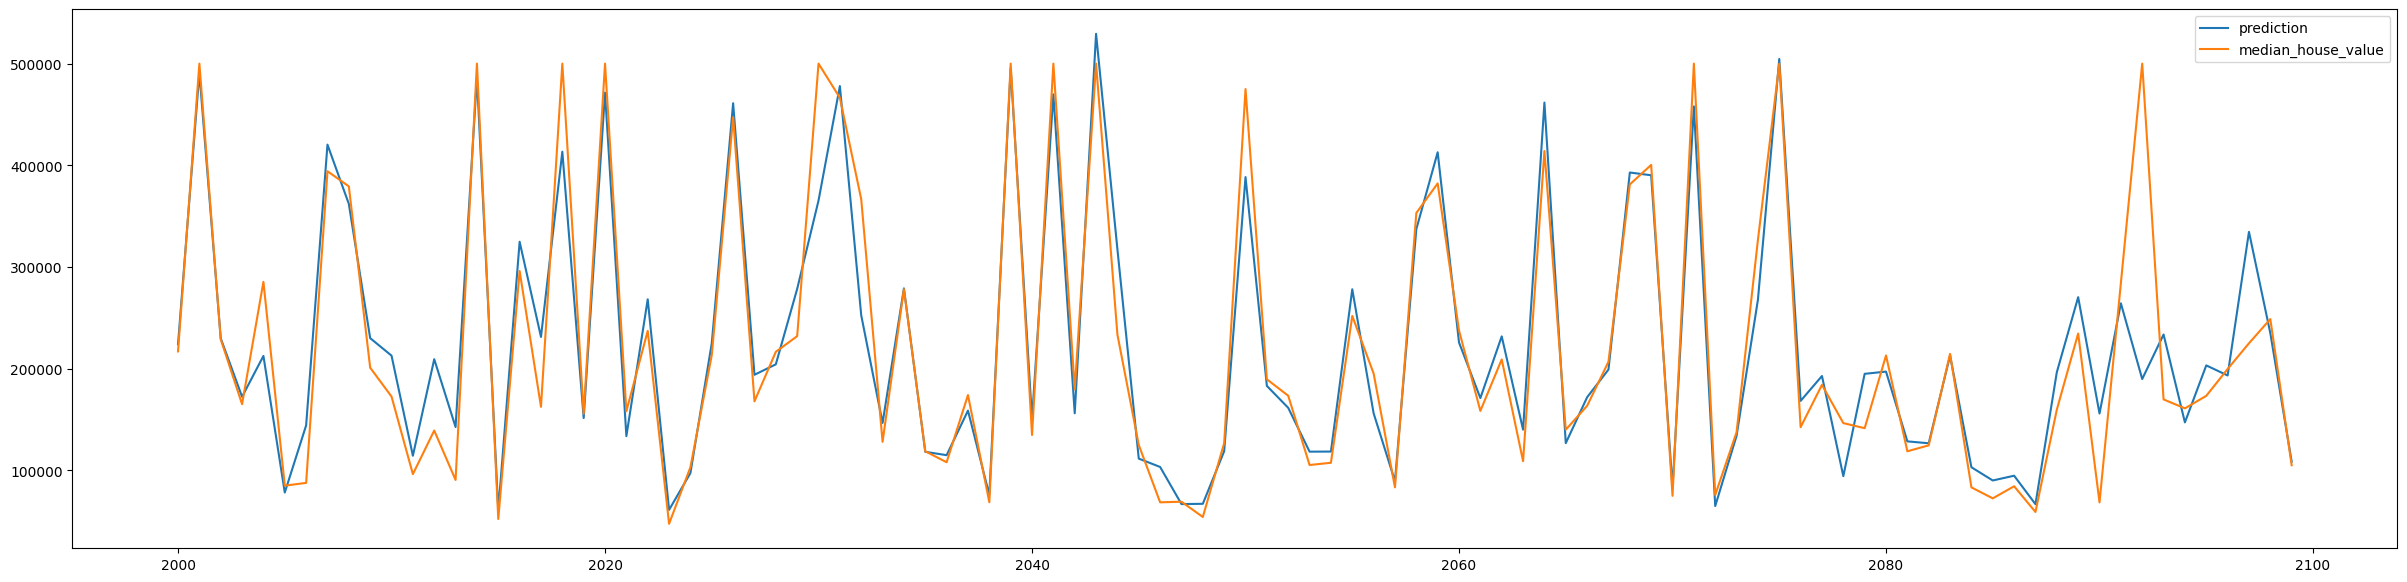

In [52]:
table.iloc[2000:2100,:].plot(figsize=(30,7))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

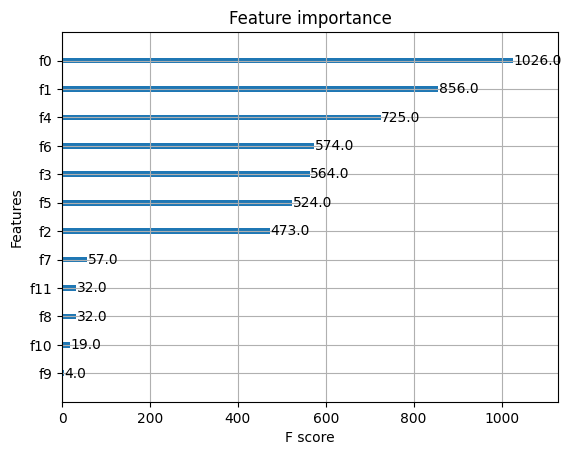

In [53]:
from xgboost import plot_importance

plot_importance(xgb_model)

- F0 : LONGTITUDE
- F1 : LATITUDE
- F4 : MEDIAN_INCOME
- F6 : bedrooms_p_room
- F3 : POPULATION

집값에 큰 영향을 주는 것은 지역, 중간소득, 인구수 등이 중요

해당 예측 그래프가 대부분의 추세를 맞추므로, 향후 집값에 대한 보조지표로 활용가능하며

하지만 위치적인 변수가 가장 상단을 차지하므로, 이 부분은 변화될 수 없기 때문에 향후 이 두 변수를 제외하고 분석을 해야할 것 같음

그렇게 분석이 되어도 좋은 성능을 보인다면 사람들의 동향에 맞춰서 집값에 대한 추세를 관찰할 수 있을 것이라 파악